
# CSCE633 Fall 2022 (Total 100 pts)

**Machine Learning**

**Homework 4**

Instructor: Yoonsuck Choe

Nov 4, 2022


---

**Student name:** Mukherjee Debajoy



---

The google drive link is
https://drive.google.com/drive/folders/18-3-UTiKl-g1ZuHSzdTkeRb7s5Ur0h9f?usp=sharing

# Common instructions (Read carefully)

**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```

# Section I: Dimensionality Reduction

**Problem 1 (Written: 10pts):** 

Consider the data sets below: Data set 1 = Spiral data, Data set 2 = Point cloud data, and Data set 3 = simple data. You can plot the data first. 
- Plot the first column in the data against the second column
``` D1[:,0] , D1[:,1] ```
- Make sure you use aspect ratio of 1 when plotting, so that the x- and y-axis have the same scale.
```
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(....)
```
- Use "." for plotting style:  
```plt.plot(...,".") ```

(1) Which of the three data sets D1, D2, and D3 would be the most appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

(2) Which of the three data sets D1, D2, and D3 would be the least appropriate for  PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

**Hint:** 
- Although the data are not labled into different classes, you may be able to "see" two possible groups of points in each data set. When you use  PCA to project all the data points to the PCA space (using the 1st and 2nd principal component vectors), would you be able to distinguish the two groups, just based on the 1st principal component axis? 
- Also, you can think about the variance in the original data (along the two axes) and the variance in the resulting projection (along the two principal component axes). 



**Answer:**

Fill out the code cell below for the plot, and enter your answer here:

(1)The most appropriate for PCA analysis is the simple data because it can be easily seen to seperate at the origin. So if we use a simple projection to a tilted x y axis it should be easy to find the direction for maximum variance and hence easy to solve them. D3 is best for pca. 

(2) The least appropraiate is the spiral dataset as I thing it is very difficult to seperate the two classes even after projection along the principal component axes. D1 is worst for pca. Since we understand that both the axis are somewhat symmetrical the variance should be roughly the same, hence difficult to then seperate the data. Also data is non linear somewhat so pca might fail.


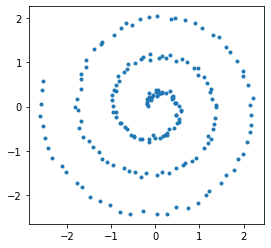

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#--------------------
def spiral_1(t):
#--------------------
  '''
  parametric curve of a spiral : clockwise
  '''
  rand_factor = 1.0

  dat   = np.array([(t+1)*np.sin(t+5), (t+1)*np.cos(t+5)])
  noise = np.random.rand(2,len(dat[0,:]))*rand_factor
  return (dat+noise-0.5)/7.5


"""
Data set 1 : D1 = spiral like data

- This is a variation on the parametric plot for a circle [cos(t), sin(t)], with a gradually increasing radius. 
"""

# data set 1 [x, y]

t = np.arange(0, 6*np.pi, 0.1)
D1 =  np.transpose(spiral_1(t))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D1[:,0],D1[:,1],".")

# Plot it
# -- add your plotting code here


"""
Data set 2 : D2 = point cloud data (normal distribution)
"""

x = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))
y = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))

D2 = np.vstack((x,y)).T


# Plot it 
# -- add your plotting code here

"""
Data set 3: D3 = simple data
"""

D3 = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])


# Plot it
# -- add your plotting code here : use aspect ratio 1 (see below)


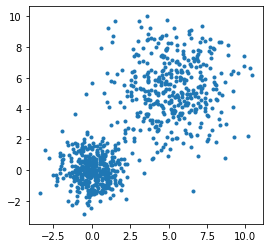

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D2[:,0],D2[:,1],'.')

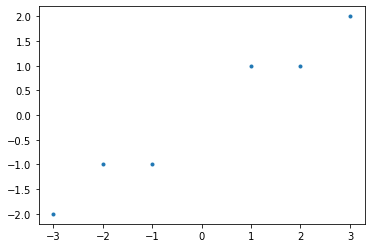

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D3[:,0],D3[:,1],'.')

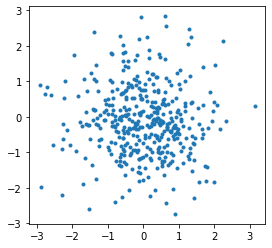

In [ ]:
# Example plotting code

# data 
x = np.random.normal(0,1,400)
y = np.random.normal(0,1,400)

# plot
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(x,y,'.')  
ax.set_aspect('equal') # set aspect ratio to 1.0

**Problem 2 (Program: 15pt)**

Use scikit learn's PCA package to analyze the data set from problem 1. Use the template below.

```
from sklearn.decomposition import PCA

X = .... # data (you can reuse D1, D2, D3 from above (Problem 1)

# plot X : X[:,0] against X[:,1]

pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)

Z = pca.fit_transform(X)


# plot Z : Z[:,0] against Z[:,1]

```

For each of the three data sets D1, D2, D3: 

(1) [1pt] Plot the original data set (X). Fix aspect ratio to 1. 

(2) [1pt] Plot the projected data set (Z). Fix aspect ratio to 1. 

(3) [2pt] Compare the variance along the first and second principal component vectors (```pca.singular_values_```) for each data set.

- D1: 
- D2:
- D3: 

(4) [6pt] Comment on how these results relate to your answers in Problem 1. 





**Answer:**

Fill out the code in the code cell below, and enter your answer here: 

(1) Just refer to the code below. 

(2) Just refer to the code below.

(3) 
The variance along principle component axis for D1 is 
[15.79445561 14.58708457]
The Variance along the principle component axis for spiral data or D2 is [113.62328771  43.98502421]
The variance along projected axis for simple data or D3 is 
[6.30061232 054980396]


Now its easy to see that for D1 the pov = 52 percent while the same pov or proportion of variance for just eigen value 1 is 71 percent while pov for simple data or data 3 is approximately 91 percent. So after PCA since the first axis has a pov(D1)< pov(D2)< Pov(D3) hence we can see that the projected axis helps to project D3 best along its projected axis then D2 then D1. The POV tells us now if we project the data along the axis of maximum variance we can easily classify

(4) As discussed in the above question, more the percentage of variance along a particular direction better will the projection and more will the seperability, so D3 is best projection then D2 then D1. Also D3 is best because it is clearly linearly seperable while D2 might still have some overlap in the 2 figures in the projection but its still better than D3 since its very hard to kind of project it since its variances are very same along both direction, so pov remains close to 50



In [ ]:
"""
Write your PCA code here, and plot the original data and the projected data 
"""

from sklearn.decomposition import PCA

X = np.array([[-1, -1], [1,1]]) # data (you can reuse D1, D2, D3 from above (Problem 1)

# IMPLEMENT THIS: plot the input X here : X[:,0] against X[:,1]

# 1. set up with input dimension = 2
pca = PCA(n_components=2)

# 2. analyze data X 
pca.fit(X)

# 3. print eigenvalues 
print(pca.singular_values_)

# 4. project data X to PCA space 
Z = pca.fit_transform(X)

# IMPLEMENT THIS: plot the projected Z here : Z[:,0] against Z[:,1]




[2. 0.]


In [ ]:
pca = PCA(n_components=2)

pca.fit(D1)

print(pca.singular_values_)

Z = pca.fit_transform(D1)


[15.79445561 14.58708457]


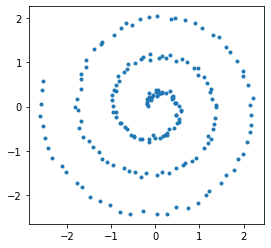

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect("equal")
plt.plot(D1[:,0],D1[:,1],'.')

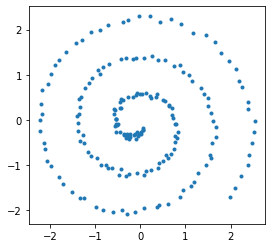

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(Z[:,0],Z[:,1],'.')

In [ ]:
pca = PCA(n_components=2)

pca.fit(D2)

print(pca.singular_values_)

Z = pca.fit_transform(D2)


[113.62328771  43.98502421]


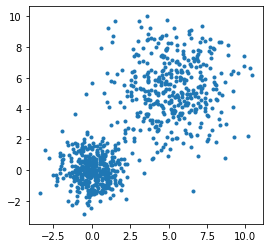

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D2[:,0],D2[:,1],'.')

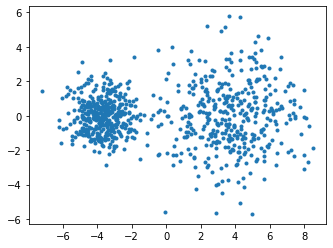

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(Z[:,0],Z[:,1],'.')

In [ ]:
pca = PCA(n_components=2)

pca.fit(D3)

print(pca.singular_values_)

Z = pca.fit_transform(D3)


[6.30061232 0.54980396]


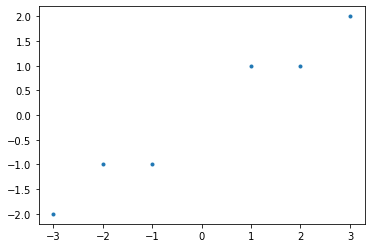

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(D3[:,0],D3[:,1],'.')

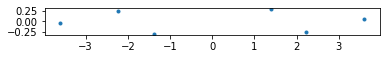

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.plot(Z[:,0],Z[:,1],'.')

**Problem 3 (Written: 15 pts):**

(1) Explain why manifold learning can effectively handle data like the data set D1 in Problem 1 (the spiral data). [5pt]

(2) For the spiral data (data set D1), what would be an appropriate $\epsilon$ value for use in ISOMAP? Give a specific value as your answer (e.g. $\epsilon = 2.5$), and explain your reasoning. **Hint:** By eyeballing the data, you can see that $\epsilon$ cannot be less than a certain value (graph will be disconnected), while it cannot be greater than a certain value (points across different parts of the spiral will be connected), in order to recover the manifold structure. Pick a number between these two bounds.  [10pt] 


In [ ]:

max = 0
for i in range(len(D1)-1):
  dist = np.linalg.norm(D1[i]-D1[i+1])
  if(dist>max):
    max=dist
    a = []
    a.append([D1[i],D1[i+1],i])
    

print(max,a)



0.3445653155907394 [[array([-2.57615201, -0.19276593]), array([-2.55089338,  0.15087234]), 185]]


In [ ]:
print(D1[185],D1[186])

[-2.57615201 -0.19276593] [-2.55089338  0.15087234]


In [ ]:
np.linalg.norm(D1[1]-D1[61])

0.8296235629901861

In [ ]:
for i in range(1,len(D1)):
  if(np.linalg.norm(D1[0][1]-D1[i][1])<0.01):
    print(D1[0],D1[i],i,np.linalg.norm(D1[0]-D1[i]))
    break

[-0.15549276  0.04762801] [-0.92172422  0.05351907] 60 0.7662541072308018


**Answer:**

(1) This data is a 1 D manifold and we can join any 2 points using a line. Since this is the case it wont be really fair to calculate euclidian distance to solve mds. We need to take geodesic distance between two points which are far away or different arms of the spiral. The points close can have a euclidian distance and then we can do mds. Hence isomap is best for this. Hence manifold learning can be applied as even if 2 arms of the spiral are very close they cant be neighbours when projected on a 1d space.

(2) For this epsilon>0.35 approx as it is the max distance between consecutive points and lesser than 0.5 which are different arms of the spiral, So we can chose epsilon to be 0.4 to be on the safe side for isomap to work. The max value of epsilon can be got from the innermost arms of the spirals since radius is increasing. Reffer to the code above to know how i got those values

# Section II: Conditional Independence 

**Problem 4 (Written: 10pts)**

Consider three binary variables $a, b, c \in \{0,1\}$ having the
joint probability distribution given in the table below. Show by direct
evaluation that this distribution has the property that $a$ and $b$ are 
dependent, so that $P(a,b) \neq P(a)p(b)$, but that they become independent
when conditioned on $c$, so that $ P(a,b|c) = P(a|c)p(b|c)$ for both
$c=0$ and $c=1$ [adapted from C. M. Bishop, *Pattern Recognition and Machine Learning*, Springer, 2006].

> $a$ | $b$ | $c$ | P($a$,$b$,$c$)
> --- | --- | --- | ---
> 0 | 0 | 0 | 0.375 
> 0 | 0 | 1 | <strike>0.005</strike> 0.05 (typo fixed!)
> 0 | 1 | 0 | 0.041667 
> 0 | 1 | 1 | 0.075
> 1 | 0 | 0 | 0.075 
> 1 | 0 | 1 | 0.15
> 1 | 1 | 0 | 0.008333
> 1 | 1 | 1 | 0.225


**Answer:**


Tabulate your results in the following format:

> $a$ | $b$ | P($a$,$b$) | P($a$)P($b$)
> --- | --- | --- | ---
> 0 | 0 | p(a=0,b=0)=0.425| 0.541677*0.65= 0.35208355
> 0 | 1 | p(a=0,b=1)=0.116667 |0.541677*0.35 = 0.18958345
> 1 | 0 | p(a=1,b=0)=0.225|0.458333*0.65 = 0.29791645
> 1 | 1 | p(a=1,b=1)=0.233333| 0.458333*0.35 = 0.16041655

> $a$ | $b$ | $c$ | P($a$,$b$$\mid$$c$) | P($a|c$)P($b|c$)
> --- | --- | --- | --- | ---
> 0 | 0 | 0 | p(a=0,b=0\|c=0)= 0.75| 0.750006 
> 0 | 0 | 1 | p(a=0,b=0\|c=1)=0.1 | 0.1
> 0 | 1 | 0 | p(a=0,b=1\|c=0)=0.083334| 0.083334
> 0 | 1 | 1 | p(a=0,b=1\|c=1)=0.15|0.15
> 1 | 0 | 0 | p(a=1,b=0\|c=0)=0.15|0.149999
> 1 | 0 | 1 | p(a=1,b=0\|c=1)=0.3|0.30000
> 1 | 1 | 0 | p(a=1,b=1\|c=0)=0.016666|0.01666
> 1 | 1 | 1 | p(a=1,b=1\|c=1)=0.45|0.449999

One sample of calculation is shown. Rest are done similarly. Each tables 1st row has been evaluated in the pictures below

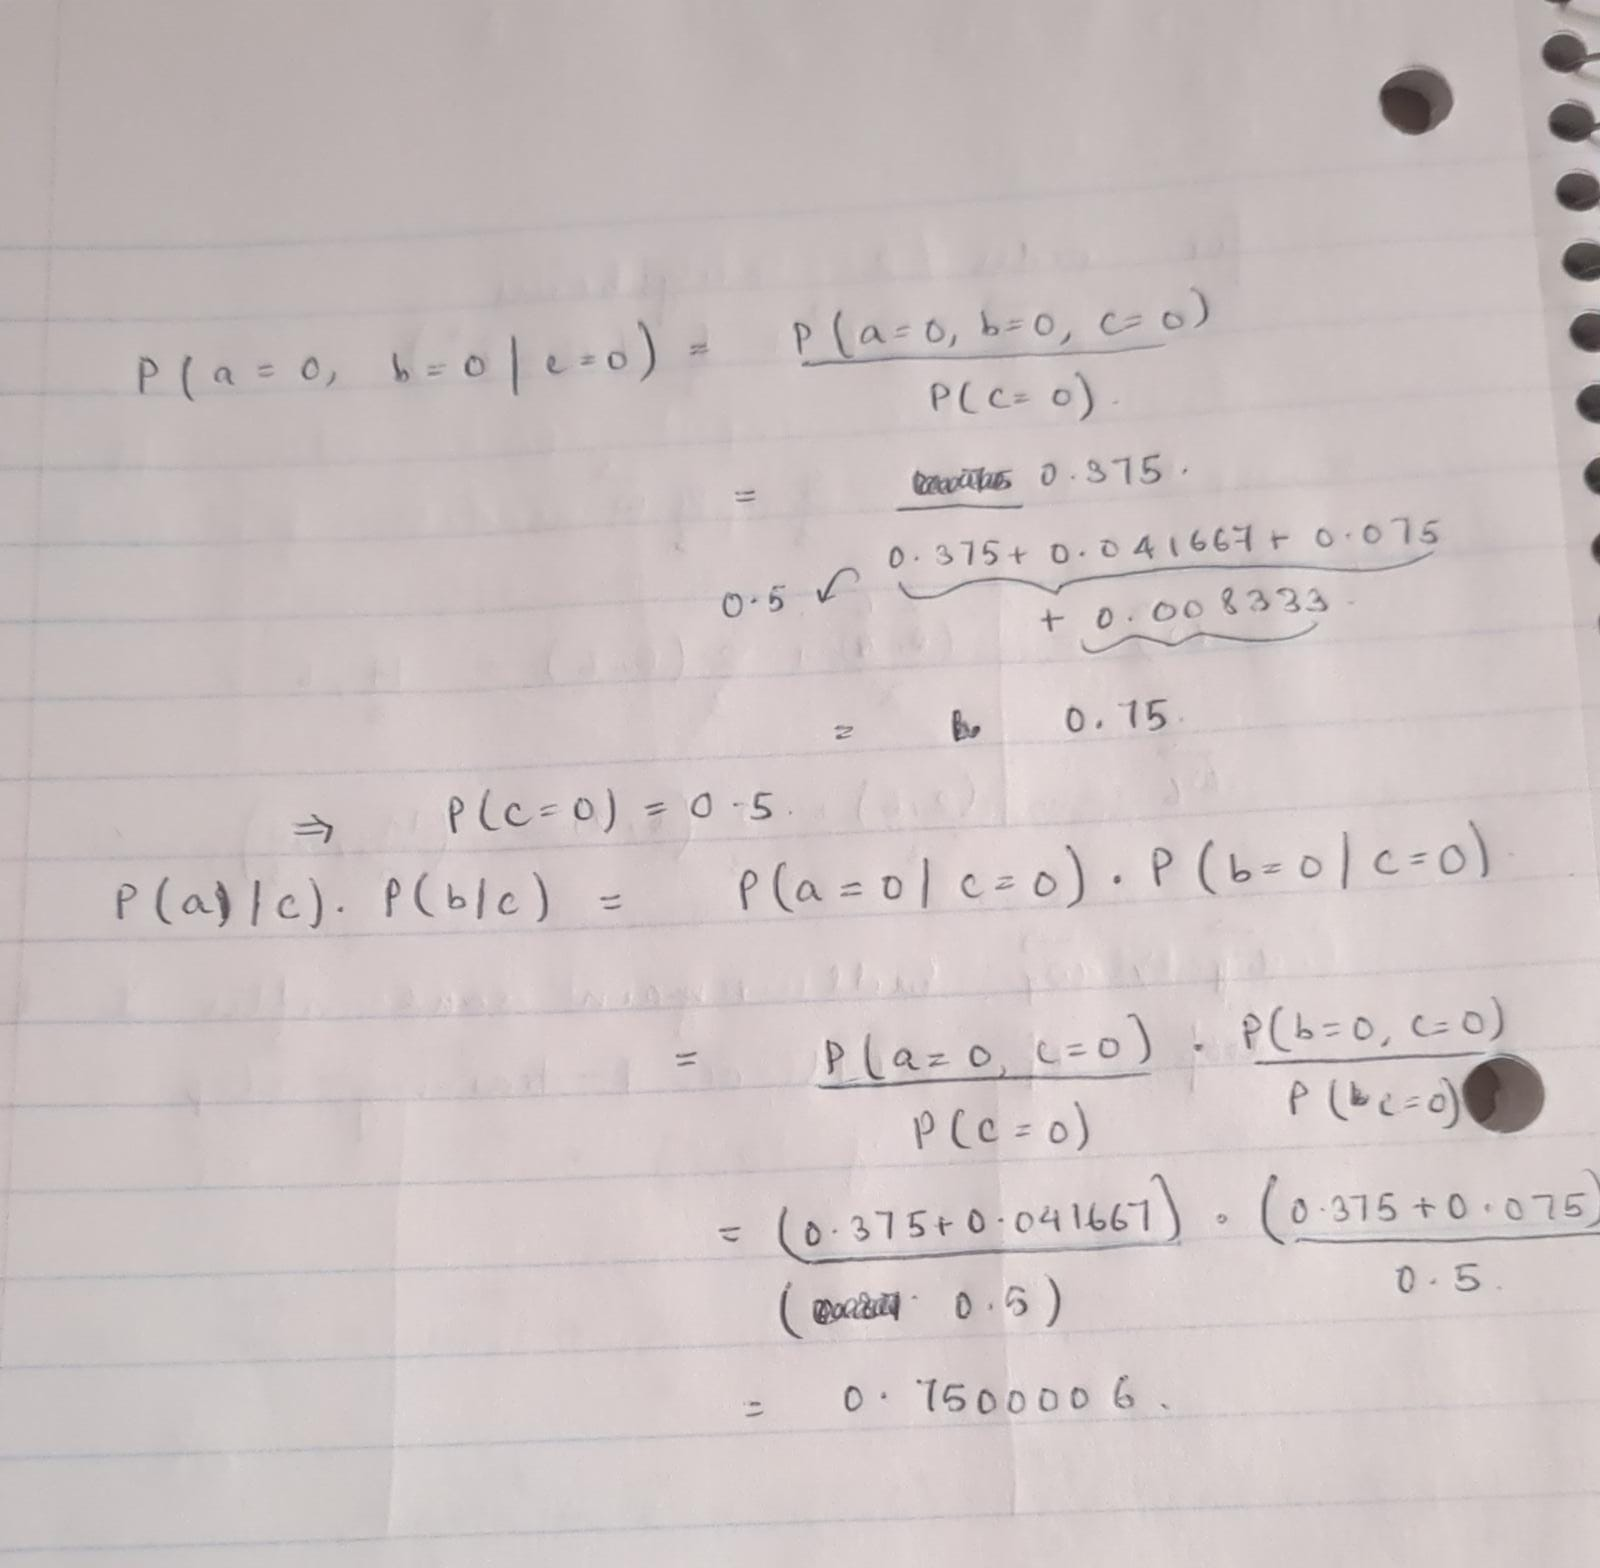

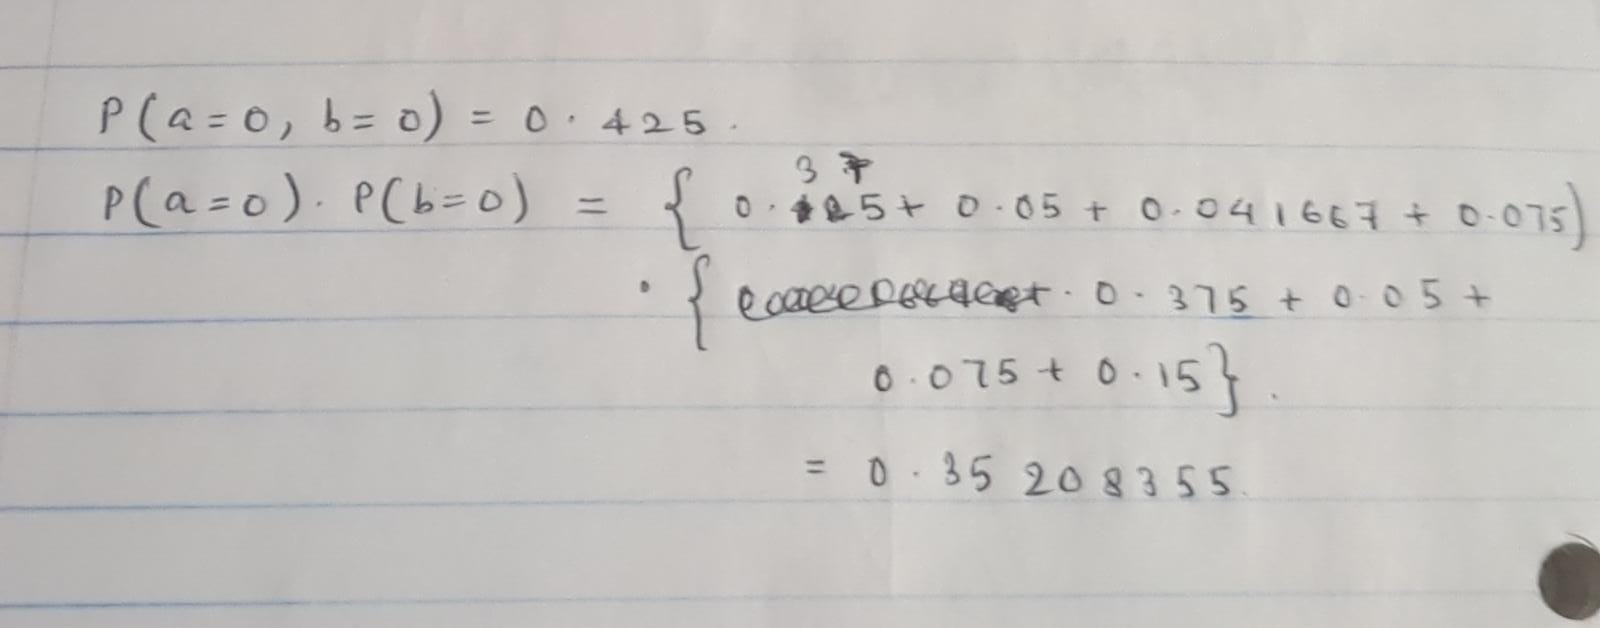

One part is shown , rest all are done similarly 

**Program 5 (Written: 10pts)**

How is the above result related to the concept of conditional independence $P(a|b,c) = P(a|c)$, $a$ is independent from $b$ given $c$? (derive $P(a|b,c) = P(a|c)$ if $ P(a,b|c) = P(a|c)p(b|c)$: **DO NOT** simply plug in the probability values from above.

**Answer**:

Given $P(a,b|c) = P(a|c)P(b|c)$

Show $P(a|b,c) = \frac{P(a,b,c)}{P(b,c)}$

**we know that $P(a,b/c) = p(a/c)*p(b/c)$
$p(a,b/c)=p(a/b,c)*p(b/c)$
but $p(a,b/c)=p(a/c)*p(b/c)$
therefore $p(a/c)*p(b/c) = p(a/b,c)*p(b/c)$
$p(a/c) = p(a,b/c)$ (prooved)**

Now $P(a,b,c)=p(a,b/c)*p(c)$
$p(a,b,c)/p(b,c) = p(a,b/c)*p(c)/p(b,c) = p(a/b,c)*p(b/c)*p(c)/p(b,c) = p(a/b,c)$ (prooved)


# Section III: Naive Bayes Classifier





Consider the data set below, for spam detection. 

We will use the Naive Bayes Classifier to learn from this data and predict new sentences. 

> Sentence | Spam
> --- | ---  
> congrats you are selected | N 
> congrats you won lottery | Y
> travel for free | Y
> good credit | N
> selected for credit cards | Y
> very good | N
> free credit cards | Y
> good night | N
> lottery | Y 
> good for you | N 

In this context, each word can be treated as an attribute, and their values will be 0 or 1 depending on the absence or existence of the word in the sentence. 

For example, "congrats" will be attribute $a_0$, "you" will be attribute $a_1$, etc. Use the following mapping for the words to attributes:

> word | attribute | dictionary index (see python code below)
> --- | --- | ---
> congrats | $a_0$ | 0
> you | $a_1$ | 1
> are | $a_2$ | 2
> selected | $a_3$ | 3
> won | $a_4$ | 4
> lottery | $a_5$ | 5
> travel | $a_6$ | 6
> for | $a_7$ | 7
> free | $a_8$ | 8
> credit | $a_9$ | 9
> cards | $a_{10}$ | 10
> very | $a_{11}$ | 11
> good | $a_{12}$ | 12
> night | $a_{13}$ | 13

```
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])
```

So, the sentence "you won free travel" would be 
> $\small (a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or simply
> $\small (0,1,0,0,1,0,1,0,1,0,0,0,0,0)$

So, the probability that "you won free travel" is a spam can be written as:
> $\small P(Spam=Yes| a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or as

> $\small P(Yes|0,1,0,0,1,0,1,0,1,0,0,0,0,0)$.

Note that word ordering does not matter, and multiple occurances of the same word is simply represented as 1. 


**Problem 6 (Program: 15pt)**

Use the skeleton code in the code cell below to train Naive Bayes on the data set (sentence / spam table in the beginning of Section III). 

Enter the data in the format shown in the code cell below. ```X``` is the input, and ```y``` is the target values. The first entry in each from the sentence/spam table is already entered in the code cell, along with the skeleton code to train and test. 

To easily verify that you entered the data correctly, write a function to convert the data vector (each row in the numpy array) to a string, and use this to print out your data in a human readable form. Use the ``dictionary`` array provided in the code cell. 

```
def vec2word(vec):
   ...
   words = ...
   ...
   return words
```

(1) Implement the above and train the Naive Bayes Classifier. Report the accuracy. [5pt]

(2) Provide 3 test sentences that are classified as "Spam" (output = 1). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(3) Provide 3 test sentences that are classified as "Not spam" (output = 0). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(4) Do you think this kind of approach can scale to a full-blown spam filter for real-life applications? This is an open ended question. [5pt]

   

**Answer:**

(1) We recieved 100 percent accuracy.

(2)congrats you are selected for free travel

[1]

[[0.35470994 0.64529006]]

congrats you are selected for free credit cards 

[1]

[[0.20786042 0.79213958]]

you won lottery for free 

[1]

[[0.07357165 0.92642835]]


(3)very good night for you

[0]

[[0.96620382 0.03379618]]

you are very good 

[0]

[[0.97556579 0.02443421]]

you are good for credit

[0]

[[0.90503067 0.09496933]]

(4) Absolutely not. Naive bayes is a very naive algorithm since the dataset is very simple it sometimes assosiates certain words for very high probability wrt to a class and might tend towards it even when the context is different. Specifically words like free,cards,lottery in this example have been tending towards spam and as a result, even when the context is different it might predict spam, which may take a very important email to spam. This is entirely responsible because of the independence assumption in naive bayes

In [ ]:


import numpy as np
from sklearn.naive_bayes import MultinomialNB

#-------
# dictionary, to look up words from the data vector -- case sensitive! 
#-------
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])

#-------
# vec2word: convert data vector to words
#-------
def vec2word(vec):
  """
  arguments: vec = np.array([0,1,...])
  returns: string of sentence corresponsing to the vector (word may not be ordered properly)
  """
  s =""
  for i in range(len(vec)):
    if(vec[i]==1):
      s+=dictionary[i]+" "

  return s

vec = np.array([
 [1,1,1,1,0,1,0,1,0,0,0,0,0,0]])
print(vec[0])
print(vec2word(vec[0]))


#--------------------------------
# spam data : enter your data here 
#--------------------------------
X = np.array([
 [1,1,1,1,0,0,0,0,0,0,0,0,0,0],   # congrats you are selected: not spam
 [1,1,0,0,1,1,0,0,0,0,0,0,0,0],   # congrats you won lottery: spam
 [0,0,0,0,0,0,1,1,1,0,0,0,0,0],   # travel for free: spam
 [0,0,0,0,0,0,0,0,0,1,0,0,1,0],   # good credit: no spam
 [0,0,0,1,0,0,0,1,0,1,1,0,0,0],   # selected for credit cards: spam
 [0,0,0,0,0,0,0,0,0,0,0,1,1,0],   # very good: no spam
 [0,0,0,0,0,0,0,0,1,1,1,0,0,0],   # free credit cards: spam
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1],   # good night: no spam
 [0,0,0,0,0,1,0,0,0,0,0,0,0,0],   # lottery: spam
 [0,1,0,0,0,0,0,1,0,0,0,0,1,0],    # good for you: no spam
])
y = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
clf = MultinomialNB()
clf.fit(X, y)

print("Score (accuracy: 1.0 = 100%)= ",end="")
print(clf.score(X,y))

print("Spam test: you won lottery: answer=",end="")
test = np.array([[0,1,0,0,1,1,0,0,0,0,0,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.

print("")
print("Spam test: you are very free: answer=",end="")
test = np.array([[0,1,1,0,0,0,0,0,1,0,0,1,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
# test your vec2word() function here, with the test data. 
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.


[1 1 1 1 0 1 0 1 0 0 0 0 0 0]
congrats you are selected lottery for 
Score (accuracy: 1.0 = 100%)= 1.0
Spam test: you won lottery: answer=[1]
[[0.23650857 0.76349143]]

Spam test: you are very free: answer=[0]
[[0.72690638 0.27309362]]


In [ ]:

test = np.array([[1,1,1,1,0,0,1,1,1,0,0,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.


test = np.array([[1,1,1,1,0,0,0,1,1,1,1,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
print(vec2word(test[0]) )
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.

test = np.array([[0,1,0,0,1,1,0,1,1,0,0,0,0,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
print(vec2word(test[0]) )
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.


congrats you are selected travel for free 
[1]
[[0.35470994 0.64529006]]
congrats you are selected for free credit cards 
[1]
[[0.20786042 0.79213958]]
you won lottery for free 
[1]
[[0.07357165 0.92642835]]


In [ ]:
test = np.array([[0,1,0,0,0,0,0,1,0,0,0,1,1,1]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
print(vec2word(test[0]))
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.


test = np.array([[0,1,1,0,0,0,0,0,0,0,0,1,1,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
print(vec2word(test[0]) )
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.

test = np.array([[0,1,1,0,0,0,0,1,0,1,0,0,1,0]]) # note: np.array([[ ... ]]), not np.array([ ... ]) 
print(vec2word(test[0]) )
print(clf.predict(test))
print(clf.predict_proba(test))  # [1. 0.] correspond to NoSpam and Spam probability, respectively.


you for very good night 
[0]
[[0.96620382 0.03379618]]
you are very good 
[0]
[[0.97556579 0.02443421]]
you are for credit good 
[0]
[[0.90503067 0.09496933]]


# Section IV: Local Methods

**Problem 7 (Written: 15 pts)**

The SOM, given an input vector $\vec{x}$ and the best matching unit index $i(\vec{x})$, the learning rule for the reference vector for unit $j$ is:
$$ \vec{w}_j \leftarrow \vec{w}_j + \eta h(j,i(\vec{x}))(\vec{x} - \vec{w}_j) $$

- The learning rate is fixed $\eta = 1$.

- Let $h(j,i(\vec{x})) = 1$, for the best matching unit $j=i(\vec{x})$, $h(j,i(\vec{x})) = \frac{2}{3}$ for its immediate neighbor ($j = i(\vec{x})\pm1$) and $h(j,i(\vec{x})) = \frac{1}{3}$ for its second-order neighbor ($j = i(\vec{x})\pm2$). For all the rest, $h(j,i(\vec{x})) =0$.

(1) Consider a 1-D SOM with 7 units with the following weight vectors.
Plot the vectors and connect them according to the order given below ($\vec{w}_1$ connected to $\vec{w}_2$, etc.).
>  $\vec{w}$ | $w_1$ | $w_2$
> --- | --- | ---
> $\vec{w}_1$ | 2 | 0
> $\vec{w}_2$ | 6 | 6
> $\vec{w}_3$ | 1 | 4
> $\vec{w}_4$ | 3 | 6
> $\vec{w}_5$ | 1 | 1
> $\vec{w}_6$ | 6 | 2
> $\vec{w}_7$ | 5 | 4

(2) Given an input vector $\vec{x} = (2,6)$, plot how the weight vectors change after one iteration of training. Plot in the same graph as (1) above.

**Answer:**

(1) Show the plot

(2) Show the plot 

You may use a code cell to plot the above.


In [ ]:
import numpy as np
import pandas as pd
array = np.array([[2,0],[6,6],[1,4],[3,6],[1,1],[6,2],[5,4]])
column_names = ['w1','w2']
index_values = ['w1','w2','w3','w4','w5','w6','w7']
data = pd.DataFrame(data=array,index = index_values,columns = column_names)


In [ ]:
data

,w1,w2
w1,2,0
w2,6,6
w3,1,4
w4,3,6
w5,1,1
w6,6,2
w7,5,4


Text(0.5, 1.0, 'Before Training')

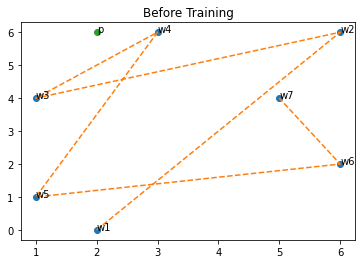

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(data)):
  plt.annotate(index_values[i],(array[i][0],array[i][1]))
plt.plot(array[:,0],array[:,1],'o')
plt.plot(array[:,0],array[:,1],'--')
plt.annotate('p',(2,6))
plt.plot(2,6,'o')
plt.title("Before Training")



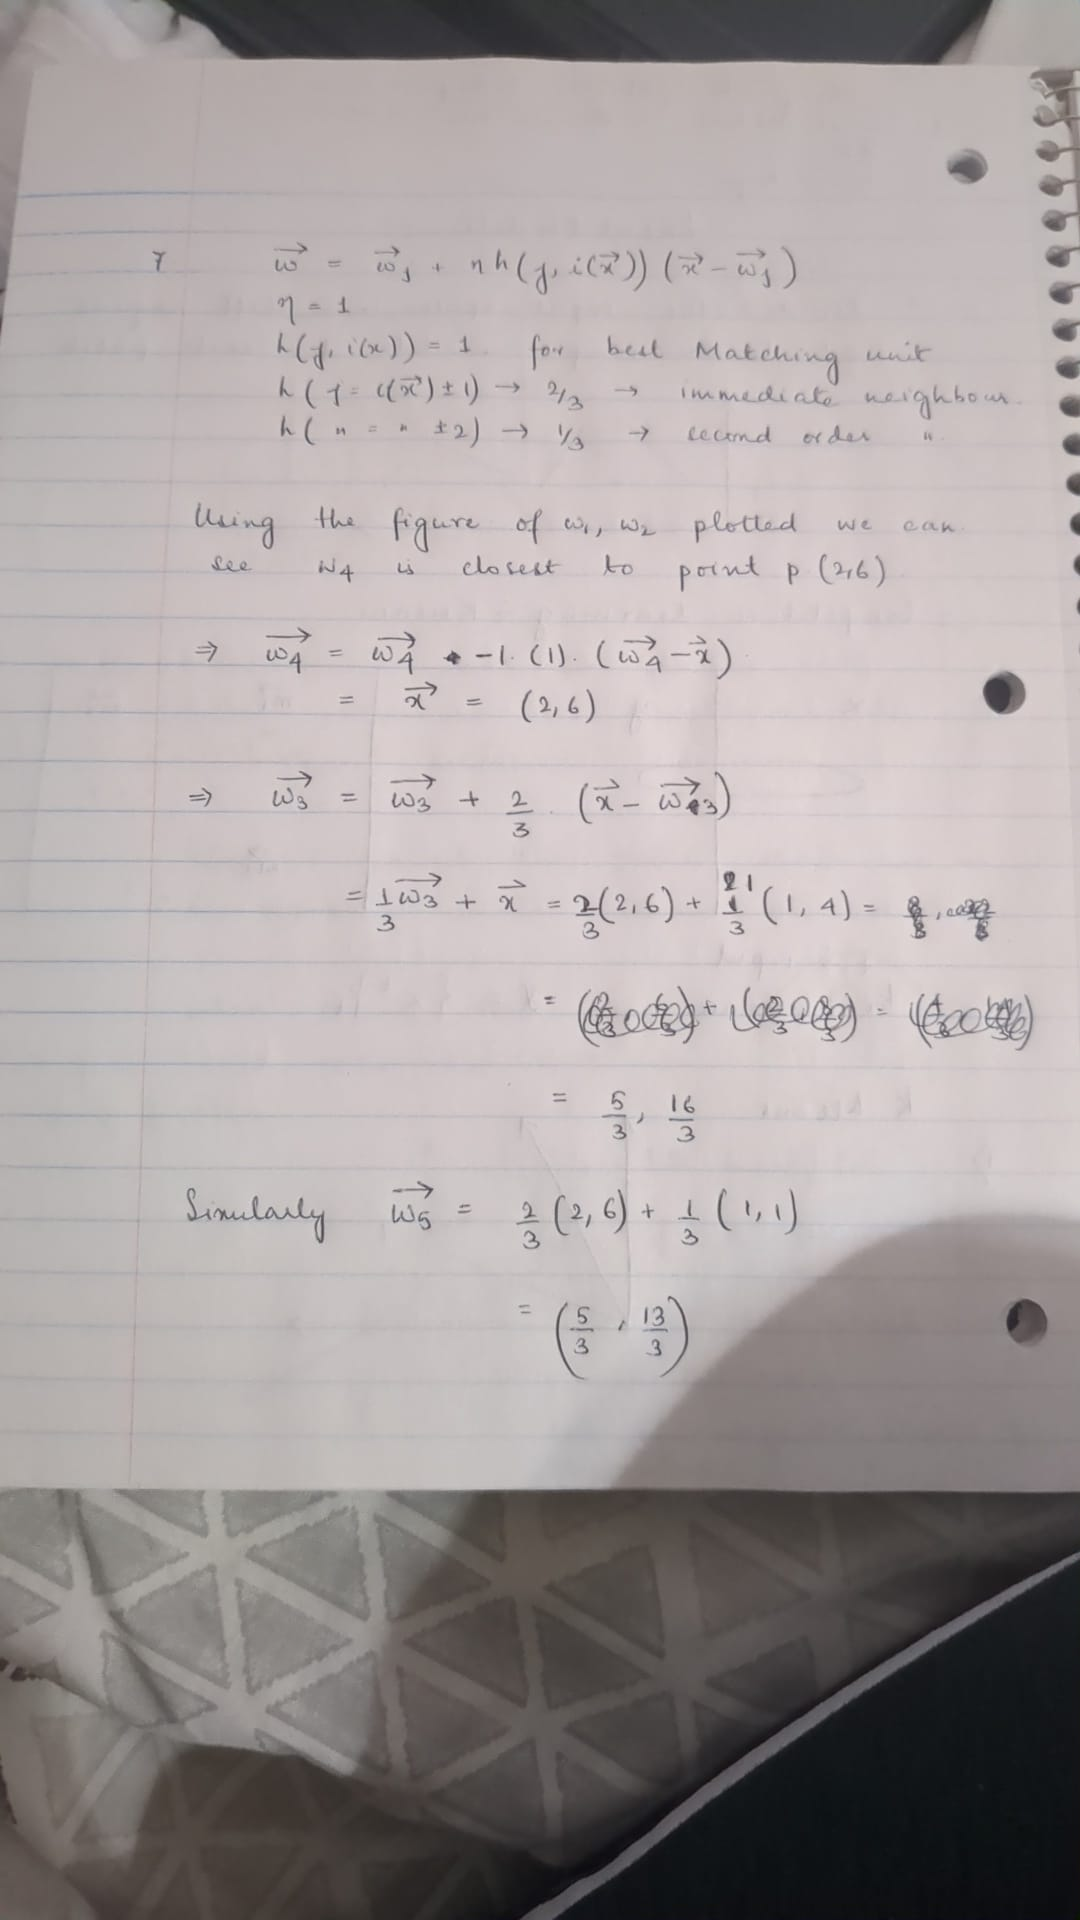

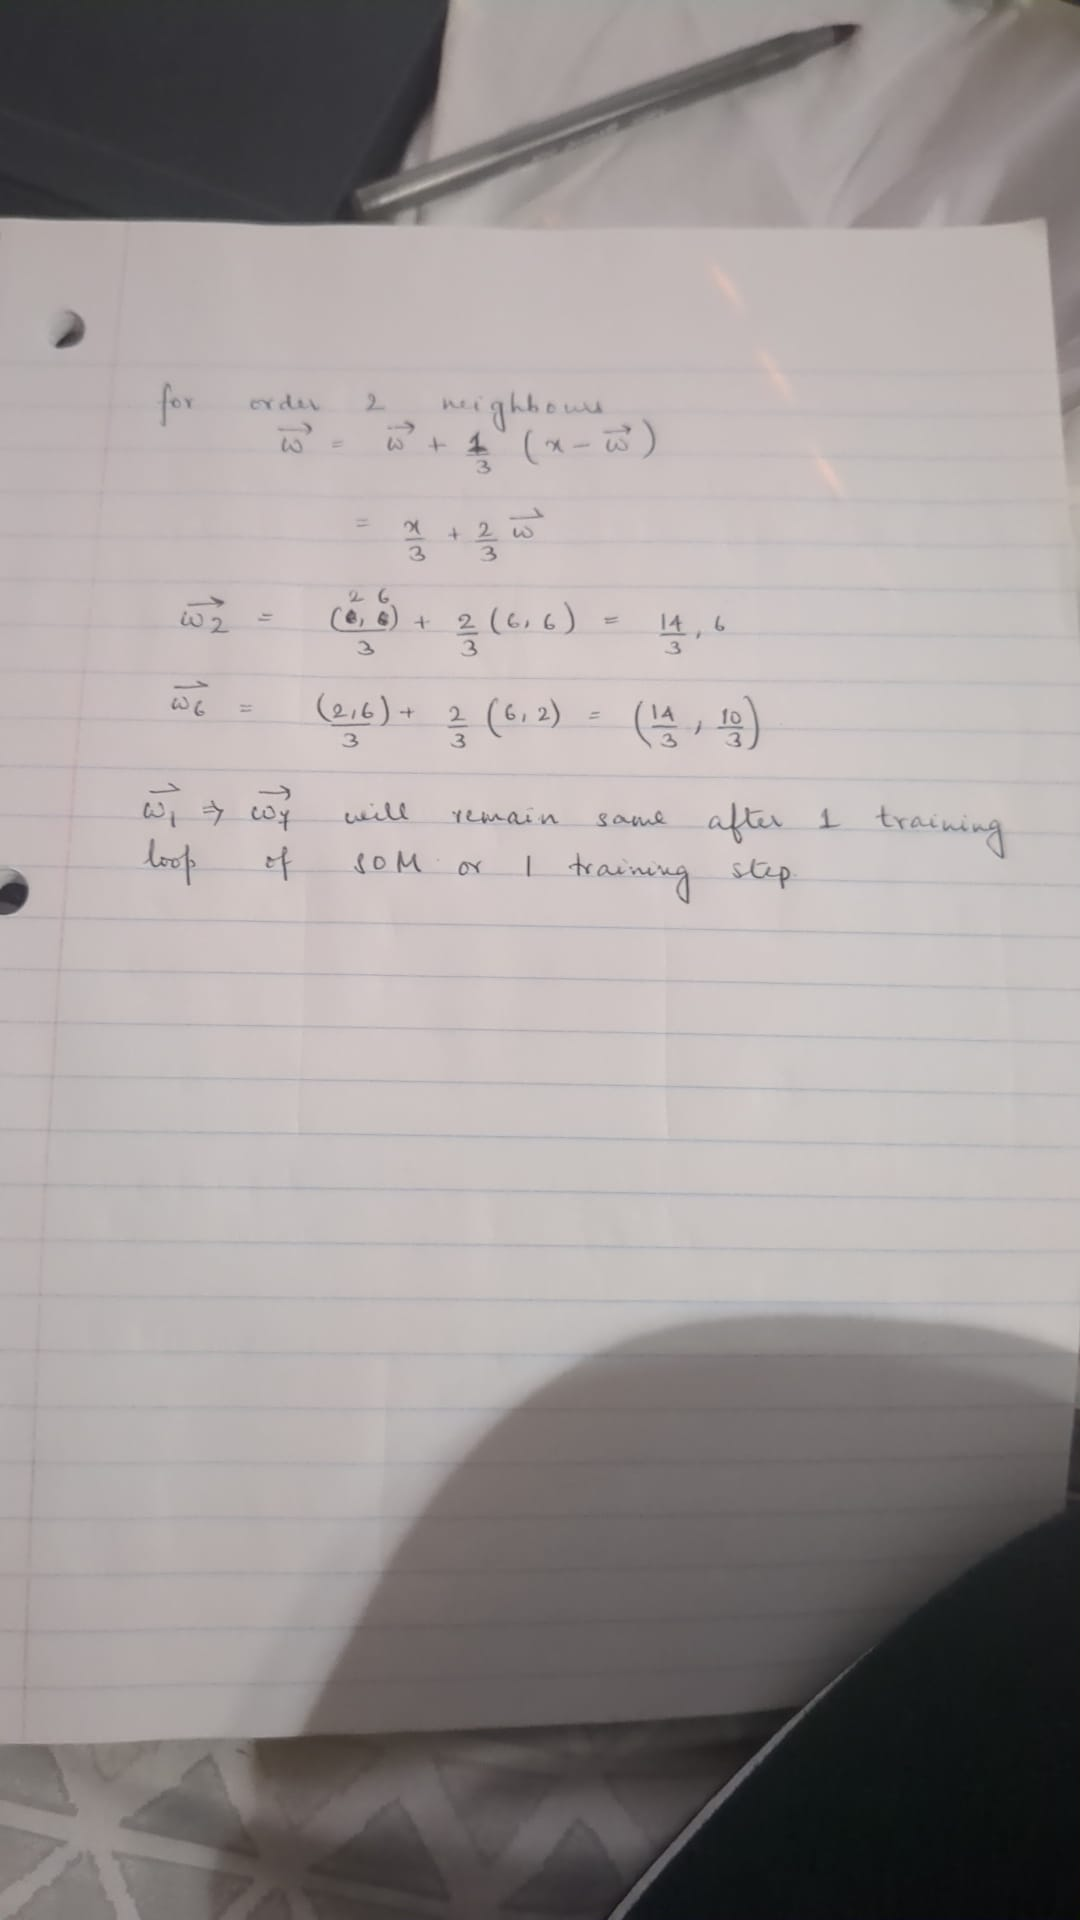

Text(0.5, 1.0, 'After Training')

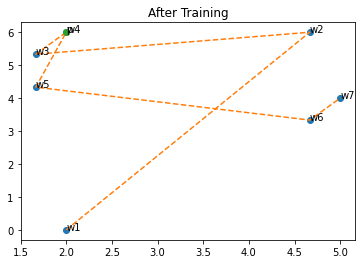

In [ ]:
array = np.array([[2,0],[14/3,6],[5/3,16/3],[2,6],[5/3,13/3],[14/3,10/3],[5,4]])
for i in range(len(data)):
  plt.annotate(index_values[i],(array[i][0],array[i][1]))
plt.plot(array[:,0],array[:,1],'o')
plt.plot(array[:,0],array[:,1],'--')
plt.annotate('p',(2,6))
plt.plot(2,6,'o')
plt.title("After Training")

**Problem 8 (Written: 10pts)**

(1) In radial basis function networks, among (a) the RBF units, (b) output units, and (c) RBF-to-output connections, which part is associated the most with  "local" in "local learning"? Explain why. [5pt]

(2) In radial basis function networks, among (a) parameters of the RBF units (center and variance) and (b) RBF-to-output connection weights, which one can be learned in one-shot, without many iterations? Explain why. [5pt] 

1. The RBF units are the local models as local models tend to devide the data locally and fit it using models in a local region. In RBF units this is exactly what we do in rbf units as we do the K means their to find clusters.

2. RBF to connection output weights can be learned in one shot since we have the formulae w=

$P^T P^{-1} P^T y$, if n > H
else if n =h then $p^{-1}p$=w hence using this formulae we can directly compute w